## Descent-gradient algorithm implementation following:
    Batch method
    On-line method
### And using different loss functions:<br>
    L2 error
    Mean Square Error

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import shutil
import os

In [252]:
def changment(loss_function, weights, label, features):
    if loss_function == "quadratic":
        factor = -2*(label - weights.T.dot(features))
        return factor*features 
    elif loss_function == "l1":
        pass

In [253]:
def sum_changment(loss_function, weights, all_labels, all_features):
    if loss_function in {"quadratic", "MSE"}:
        delta = np.zeros(weights.shape)
        for i in range(len(all_labels)):
            delta += changment("quadratic", weights, all_labels[i], all_features[i])
        #print(f"Delta is {delta}")
    return delta if loss_function == "quadratic" else delta/len(all_labels)

In [254]:

def descent_gradient(loss_function:str, labels:np.array, record_features:np.array, nepochs:int, learning_rate:float, method="batch" or "on-line"):
    size = len(labels)

    init_shape = record_features.shape

    nweights = 1 if len(init_shape) == 1 else init_shape[1]
    weights = np.random.rand(nweights+1)

    # Adding the feature 1 for the bias node
    bias_feature = np.ones(size)

    cpy_record_features = record_features.reshape((size, 1)) if nweights == 1 else record_features
    cpy_record_features = np.hstack((cpy_record_features, bias_feature.reshape((size, 1))))
    #print(cpy_record_features, cpy_record_features[0])

    if method == "on-line":
        for _ in range(nepochs):
            for i in range(size):
                weights = weights - learning_rate*changment(loss_function, weights, labels[i], cpy_record_features[i])
    
    elif method == "batch":
        for _ in range(nepochs):
            weights = weights - learning_rate*sum_changment(loss_function, weights, labels, cpy_record_features)

    return weights

In [255]:
loss_function = "quadratic"
nepochs = 10000
learning_rate = 0.01
labels = np.array([3.5, 5.2, 4.5, 5.3, 6.5, 4.1])
features_X= np.array([0.1, 0.2, 0.3, 0.3, 0.5, 0.4])

In [256]:
w = descent_gradient(loss_function, labels, features_X, nepochs, learning_rate, "batch")


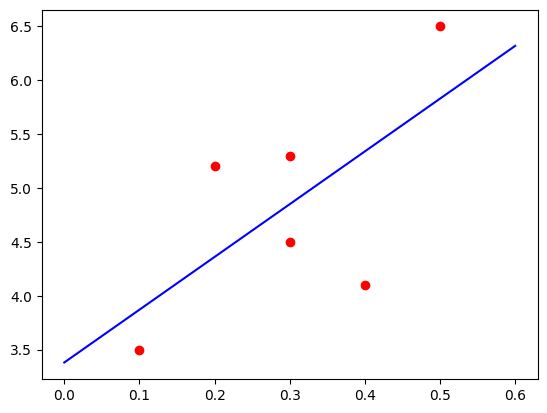

In [257]:
plt.plot(features_X, labels, 'ro', label="Original data")
z = np.linspace(0, 0.6, 100)
plt.plot(z, w[0]*z+w[-1], 'b', label="Original data")
plt.show()

In [258]:
multdm_features = np.array([
    [0.5, 3],
    [0.4, 3],
    [0.4, 4],
    [2.3, 5],
    [2.1, 5],
    [2.2, 4.5]
])

_w_ = descent_gradient("quadratic", labels, multdm_features, 10000, 0.001, "batch")
print(_w_)


[-0.40191006  1.03463438  1.15272636]


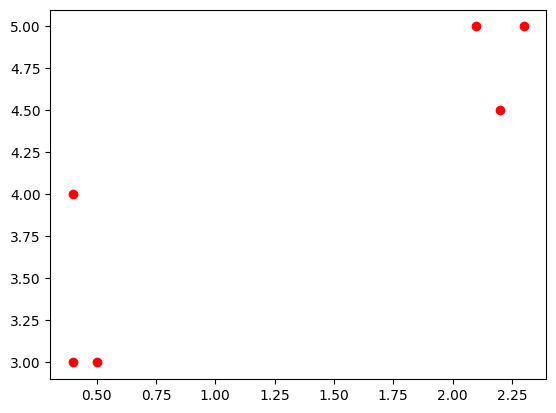

In [259]:
plt.plot(multdm_features[:, 0], multdm_features[:, 1], 'ro', label="Original data")
plt.show()

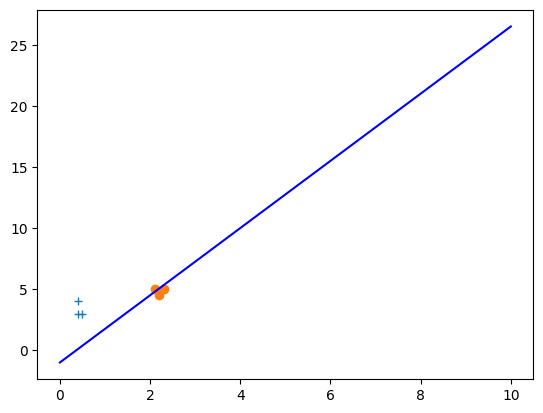

In [260]:
labels = np.array([1, 1,  1, -1, -1, -1])

def perceptron(cpy_multdm_features, labels, nepochs, learning_rate):

    init_shape = cpy_multdm_features.shape
    nweights = 1 if len(init_shape) == 1 else init_shape[1] -1
    weights = np.random.rand(nweights+1)
    

    for _ in range(nepochs):
        misclassified = 0
        delta = 0
        for i in range(len(labels)):
            cost = labels[i]*weights.T.dot(cpy_multdm_features[i])
            if cost <= 0:
                misclassified += 1
                delta += labels[i]*cpy_multdm_features[i]
        weights = weights + learning_rate*delta
    return weights

cpy_multdm_features = np.hstack((multdm_features, np.ones(len(labels)).reshape((-1, 1))))
final = perceptron(multdm_features, labels, 100, 0.1)
#print(final)
posCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == 1])
negCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-final[0]*z-final[-1])/final[1]
plt.plot(z, separator_equation, 'b')
plt.show()

In [261]:
import pandas as pd
iris_data = pd.read_csv("C:/Users/Junior/Documents/3A/AI/TDs/iris_a.txt", header=None)
feature_array = np.array(iris_data)
size = len(feature_array)

C:\Users\Junior\AppData\Local\Temp\ipykernel_22112\1859224570.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  e.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_22112\1859224570.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_22112\1859224570.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_22112\1859224570.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()
C:\Users\Junior\AppData\Local\Temp\ipykernel_22112\1859224570.py:39: UserWarning: Matplotlib is currently using modul

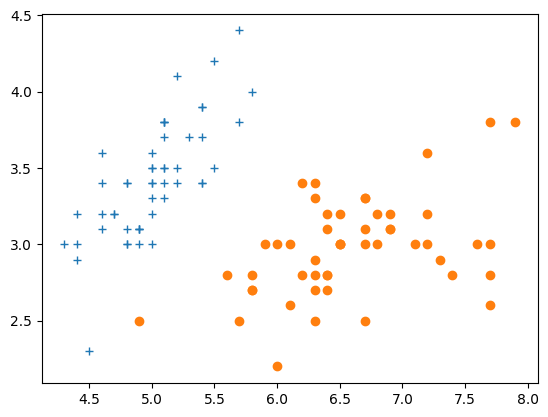

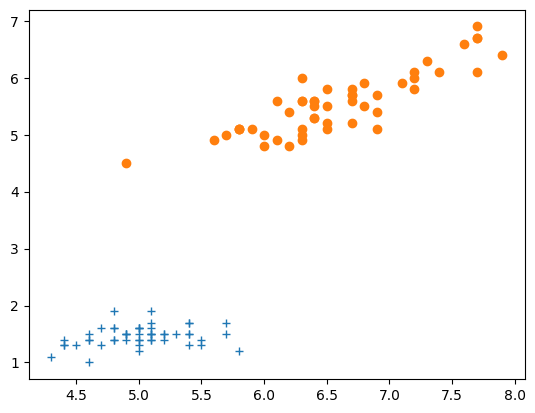

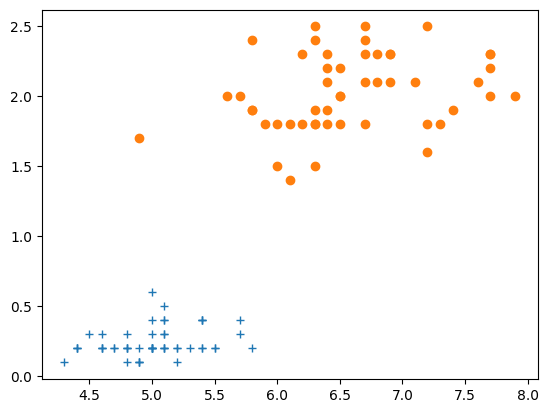

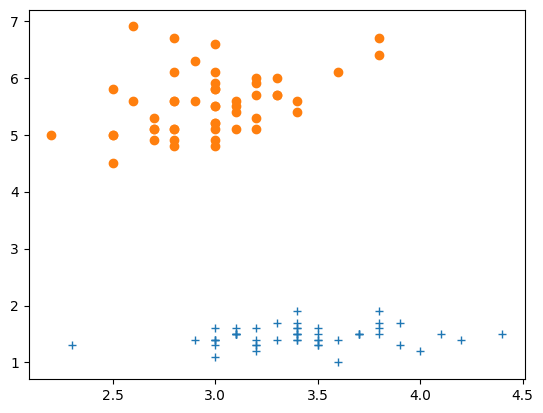

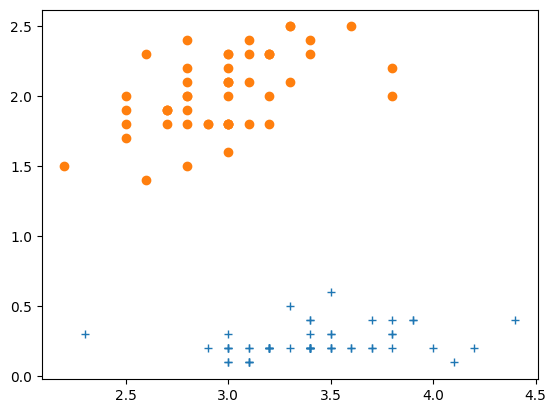

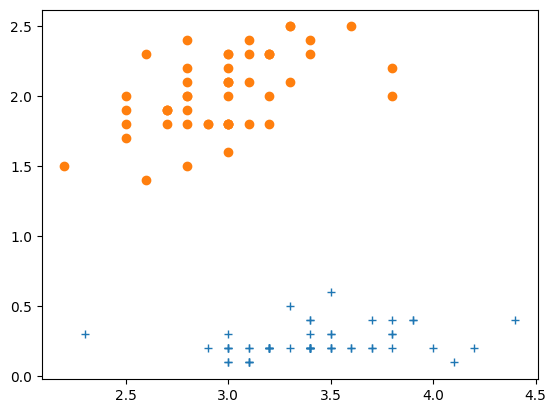

In [262]:

posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == -1])
e = plt.figure(0)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
e.show()


posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

f = plt.figure(1)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
f.show()

g = plt.figure(2)
posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
g.show()

h = plt.figure(3)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
h.show()

i = plt.figure(4)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
i.show()

j = plt.figure(5)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
j.show()

## Training of a Perceptron model on iris dataset

In [263]:
#print(feature_array[:, 0:2], feature_array[:, -1])

np.random.shuffle(feature_array)
#print(feature_array)
labels = feature_array[:, -1]
cpy_multdm_features = np.hstack((feature_array[:, 0:2], np.ones(len(labels)).reshape((-1, 1))))

[-2.91812798  5.01303398  1.22635797]


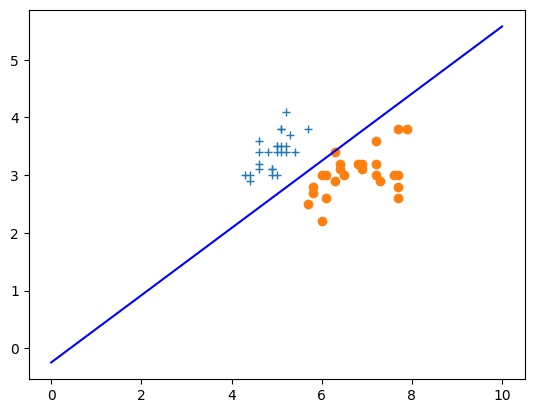

In [264]:

"""
#------------------------------------------------------------#
Splitting data in train set and test set
"""
#print(cpy_multdm_features[0:5,:])

fifty = len(labels)//2
train_set = cpy_multdm_features[0:fifty, :]
train_y = labels[0:fifty]

test_set = cpy_multdm_features[fifty: , :]
test_y = labels[fifty:]



#------------------------------------------------------------#
#Training the perceptron

iris_weights = perceptron(train_set, train_y, nepochs, learning_rate)

print(iris_weights)
posCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == 1])
negCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == -1])

#print(posCategorie)
#print(negCategorie)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-iris_weights[0]*z-iris_weights[-1])/iris_weights[1]
plt.plot(z, separator_equation, 'b')
plt.show()




In [265]:
#------------------------------------------------------------#
#Testing the perceptron

def predict(weights:np.array, test_set, test_y, metric="accuracy"):
    size = len(test_y)
    predictions = []

    for i in range(size):
        prediction = weights.dot(test_set[i, :])
        predictions.append(prediction)
    
    return compute_metric(predictions, test_y, "SimpleCategorisation", metric)


def compute_metric(predictions, labels, usage="LogisticRegression", metric="accuracy", error_function="percept"):
    #---------------------------------------------------------------
    # Colors code to display metrics
    #---------------------------------------------------------------
    red = "\n\033[31m"
    green = "\n\033[32m"
    yellow = "\n\033[33m"
    blue = "\n\033[34m"
    magenta = "\n\033[35m"
    cyan = "\n\033[36m"
    reset = "\033[0m\n"

    if usage in ['LogisticRegression', 'MultiClassification', 'SimpleCategorisation']:
        
        size = len(labels)
        
        good_prediction= lambda prediction, label, error_function: prediction*label >=0 if error_function == "percept" \
            else prediction==label if error_function == "simple" else 5
        
        is_positive = lambda x: x >= 0 if usage == "SimpleCategorisation" else x == 1 if usage == "LogisticRegression" else x >= 0

        is_negative = lambda x: x < 0 if usage == "SimpleCategorisation" else x == 0 if usage == "LogisticRegression" else x < 0
 
        match metric:
            case "accuracy" | "acc":
                accuracy = 100*sum(good_prediction(predictions[i],labels[i],error_function) for i in range(size)) / size
                print(f" {red if accuracy < 50 else green}Your model accuracy is  {accuracy}% on this dataset {reset} ")
                return accuracy, predictions
                

            case "confusion_matrix" | "conf-mat" | "recall" | "precision" | "f1"| "au_roc":
                true_negatives, true_positives, false_negatives, false_positives = 0,0,0,0
            
                true_negatives = 0
                indexes = list(range(size))
                for i in range(size):
                    if is_negative(predictions[i]) and  good_prediction(predictions[i], labels[i],error_function):
                        true_negatives += 1
                        indexes.remove(i)
                
                tmp = indexes.copy()
                true_positives = 0
                for i in indexes:
                    if is_positive(predictions[i]) and  good_prediction(predictions[i], labels[i],error_function):
                        true_positives += 1
                        tmp.remove(i)
                
                indexes = tmp.copy()
                false_negatives = 0
                for i in tmp:
                    if is_negative(predictions[i]) and not good_prediction(predictions[i], labels[i],error_function):
                        false_negatives += 1
                        indexes.remove(i)

                false_positives = sum(is_positive(predictions[i]) and not good_prediction(predictions[i], labels[i],error_function) for i in indexes)


                if metric in ["confusion_matrix","conf-mat"]:
                    print(f" {blue}TP: {true_positives} -- TN: {true_negatives} -- FP: {false_positives} -- FN: {false_negatives} {reset} ")
                    return np.array([true_positives, true_negatives, false_positives, false_negatives]), predictions
                
                if metric in ["recall",  "f1"]:
                    recall = true_positives/(true_positives+false_positives)
                    if metric == "recall":
                        print(f"{red if recall < 0.50 else green} Recall: {recall} {reset}")
                        return recall, predictions
                
                if metric in ["precision", "f1"]:
                    precision = true_positives/(true_positives+false_negatives)
                    if metric == "precision":
                        print(f" {red if precision < 50 else green} Precision: {precision} {reset}")
                        return precision, predictions
                
                if metric == "f1":
                    f1_score = 2 / ((1/precision)+(1/recall))
                    print(f"{blue} f1 score: {f1_score} {reset} ")
                    return f1_score, predictions
                
                if metric == "au_roc":
                    tpr = true_positives/(true_positives+false_negatives)
                    fpr =  false_positives/(false_positives+true_negatives)
                    au_roc = tpr/fpr
                    print(f"{cyan} auc surface: {au_roc} {reset}")
                    return au_roc, predictions

    else:
        predictions = np.array(predictions)
        labels = np.array(labels)
        match metric:
            case "MSE":
                mse = np.mean((predictions-labels))**2
                print(f"{cyan} Mean Square Error is: {mse}{reset} ")
                return mse
            case "MSA":
                msa = np.mean((predictions-labels))
                print(f"{cyan}Mean Average Error is {msa}{reset}")
                return msa


a,b =predict(iris_weights, test_set, test_y, "conf-mat")
print(b)

 
TP: 24 -- TN: 24 -- FP: 1 -- FN: 1 
 
[2.677426808185925, 0.17828002814648447, -4.625263353820256, -3.285997554905223, 5.019299403529348, 2.8869174083611346, 4.263659200692284, 5.019299403529348, 4.01669260710096, -1.782087360262637, -1.782087360262637, -2.163592567196937, -3.12135315917767, -2.8295403611386876, -3.4131659572166564, 2.4679362080107135, 6.231396800132951, -3.368319752768996, -0.37523978554690873, -2.702371958827251, -1.0786635729047702, 3.55286520230288, 2.7222730126335817, -3.4131659572166564, -0.951495170593337, 2.51278241245837, 2.2584456078355037, -3.9144693554308505, 3.8895242047895264, 2.7597490060496996, 3.55286520230288, -4.453248747061161, 6.650378000483374, 4.428303596419837, -1.6997651623988588, -6.331293937606511, 4.892131001217918, -3.577810352944206, -0.6148361681066923, 5.393434399432112, 2.2584456078355037, -2.7846941566910273, 4.353351609587604, -5.792514545976201, 3.680033604614313, 4.6826404010427085, -2.702371958827251, -3.6226565573918643, 3.17873

# Backpropagation

In [266]:
import random
import math

class Dense():
    # -------------------------------------------------------------------#
    # Fully connected layer
    # -------------------------------------------------------------------#
    def __init__(self, nodes_count:int, activation_function = "reLu", is_output=False, categories=[]) -> None:
        # For the moment input should be like (x, )
        # a node is an array that contains 5 values: 
        # an id --
        # x::input data-- 
        # dE/dx:: derivative of error per x -- 
        # y:: output data = result of activation function f(x) -- 
        # dE/dy:: derivative of error per y
        # input_nodes:: the nodes of the previous layer that are connected to this node
        # CONVENTION the last node of a layer is the bias node
        self.activation = activation_function
        self.size = nodes_count +1 if not is_output else nodes_count
        self.is_output = is_output
        categories = categories[:nodes_count] if len(categories) >= nodes_count else categories
        self.nodes = [
            {'id':0, 
            'label':f'{categories[i]}' if i < len(categories) else '', 
            'x':0.0, 
            'dE/dx':0.0, 
            'y':0.0, 
            'dE/dy':0.0, 
            'input_nodes':[], 
            'output_nodes':[]
            } 
        for i in range(self.size)]
        
    def activate(self):
        match self.activation:
            case "identity":
                return lambda x: x
            case "reLu": 
                return lambda x: x if x > 0 else 0
            case "sigmoid":
                return lambda x: math.exp(x) / (1 + math.exp(x))
            case "softmax":
                return lambda x: math.exp(x)
            
    def derivate(self):
         match self.activation:
            case "identity":
                return lambda _: 1
            case "reLu":
                 return lambda x: 0 if x <= 0 else 1
            case "sigmoid":
                return lambda x: (self.activate()(x)) * (1-(self.activate()(x)))
            case "softmax":
                return lambda x: 1


In [267]:

class NetModel:
    def __init__(self, input_shape, usage="LinearRegression") -> None:
        #-------------------------------------------------------------------
        # For the moment, I manage 1D input data
        #-------------------------------------------------------------------
        self.input_shape = input_shape
        self.layers_stack = []
        self.weights = []
        self.type = usage if usage in ['LinearRegression', 'LogisticRegression', 'MultiClassification'] else 'LinearRegression'
        self.total_nodes = 0
        self.losses = []
        self.validation_losses = []
        self.data_real_classes = []
        self.multi_one_hot_encoding = []
        # Add input layer
        self.add_layer(Dense(self.input_shape[0], "identity"))
        
    
    def add_layer(self,layer: Dense):
        self.layers_stack.append(layer)
        
    
    def compile(self, n_nodes=1, categories=[]):
        """
        n_nodes:: Output layer nodes number; >2 for multiclassification

        """
        #-------------------------------------------------------------------
        # Define output layer activation function
        #-------------------------------------------------------------------
        if self.type == 'LogisticRegression':
            activation_function = "sigmoid"

        elif self.type == "MultiClassification":
            activation_function = "softmax"
            assert len(categories) >= 2 and len(categories) == n_nodes
            self.data_real_classes = categories
            [self.multi_one_hot_encoding.append([0, 0, 0]) for _ in range(n_nodes)]
            i = 0
            for hot_vector in self.multi_one_hot_encoding:
                hot_vector[i] = 1
                i += 1
           
        elif self.type == "LinearRegression":
            activation_function = "reLu"

        #-------------------------------------------------------------------
        # Then, add the output layer
        #-------------------------------------------------------------------
        if self.type == 'MultiClassification':
            self.add_layer(Dense(n_nodes, activation_function, is_output=True, categories=categories))
        else:
            self.add_layer(Dense(1, activation_function, is_output=True))


        layers_count = len(self.layers_stack)
        self.total_nodes = sum(self.layers_stack[i].size for i in range(layers_count)) 
        
        #-------------------------------------------------------------------
        # set nodes id
        #-------------------------------------------------------------------
        count_nodes = 0
        for i in range(layers_count):
            layer = self.layers_stack[i]
            for k in range(layer.size):
                layer.nodes[k]['id'] = count_nodes + k
            count_nodes += layer.size

        #-------------------------------------------------------------------
        # add input_nodes
        # Pay attention not to add input_nodes to bias node
        # bias node is considered the last node of a layer
        #-------------------------------------------------------------------
        for i in range(1, layers_count):
            layer = self.layers_stack[i]
            back_layer = self.layers_stack[i-1]
            back_nodes = [back_layer.nodes[a] for a in range(back_layer.size)]
            right_range = range(layer.size -1) if i < layers_count-1 else range(layer.size)
            for k in right_range:
                layer.nodes[k]['input_nodes'] = back_nodes

        #-------------------------------------------------------------------
        # create weights and Add forward nodes
        #-------------------------------------------------------------------
        i = 0
        while(i < layers_count - 1):
            layer = self.layers_stack[i]
            forward_layer = self.layers_stack[i+1]
            right_range = range(forward_layer.size-1)if i < layers_count-2 else range(forward_layer.size)
            forward_nodes = [forward_layer.nodes[i] for i in right_range ]

            i += 1
            for k in range(layer.size):
                layer.nodes[k]['output_nodes'] = forward_nodes
                for j in right_range:
                    new_weight = {f"w{layer.nodes[k]['id']}{forward_layer.nodes[j]['id']}": random.random()}
                    self.weights.append(new_weight) 
                
            
        # reformat weights
        self.weights = np.array(self.weights)


    def train(self,train_X, train_Y, cost_function="l2", nepochs=100, learning_rate=0.01, validation_per=0.25):
        # -------------------------------------------------------------------#
        # Transform labels into binary values if LogisticRegression Model
        # -------------------------------------------------------------------#
        if self.type == 'LogisticRegression':
            train_Y = np.array(train_Y)
            self.data_real_classes = np.unique(train_Y)
            assert len(self.data_real_classes) == 2
            train_Y = np.where((train_Y == min(self.data_real_classes)), 0, 1)

        if self.type == "MultiClassification":
            for i in range(len(train_Y)):
                index = self.data_real_classes.index(train_Y[i]) 
                train_Y[i] = self.multi_one_hot_encoding[index]
        
        size = int(len(train_Y)*(validation_per))
        validation_X = train_X[0:size]
        validation_Y = train_Y[0:size]
        train_X = train_X[size:]
        train_Y = train_Y[size:]

        for _ in range(nepochs):
            # -------------------------------------------------------------------#
            # Iterate over the samples
            # -------------------------------------------------------------------#
            loss_history = np.array([])

            for n in range(len(train_X)):
                # -------------------------------------------------------------------#
                # compute output
                # -------------------------------------------------------------------#
                self.forward_propagation(train_X[n])
        
                # -------------------------------------------------------------------#
                # Compute error
                # -------------------------------------------------------------------#
                if self.type != "MultiClassification":
                    output_node = self.layers_stack[-1].nodes[0]
                    E, output_node['dE/dy']= self.compute_error(output_node['y'], train_Y[n], cost_function)
                    loss_history = np.append(loss_history, E)
                else:
                    Y = [output_node['y'] for output_node in self.layers_stack[-1].nodes]
                    E, dE_per_y= self.compute_error(Y, train_Y[n], cost_function)
                    for i in range(self.layers_stack[-1].size):
                        self.layers_stack[-1].nodes[i]['dE/dy'] = dE_per_y[i]
                    loss_history = np.append(loss_history, E)
                    
                # -------------------------------------------------------------------#
                # Backpropagate
                # -------------------------------------------------------------------#
                self.backpropagate(learning_rate)
            
            rd_record_in_valdt = random.randint(0, size-1)
            validation_result = self.predict_unique(x = validation_X[rd_record_in_valdt], display_message=False, rt_real_prediction=False)
            valid_error = self.compute_error(y_predicted=validation_result, y_recorded=validation_Y[rd_record_in_valdt], cost_function=cost_function)[0]
            self.validation_losses.append(valid_error)
    
            print(f"Epoch {_}:  Loss is {np.mean(loss_history)} ")
            self.losses.append(np.mean(loss_history))
        return self.weights
    

    def forward_propagation(self, input_data):
        input_layer = self.layers_stack[0]
        # -------------------------------------------------------------------#
        # Insert data into the input layer
        # -------------------------------------------------------------------#
        for i in range(input_layer.size):
            # suppose ones column has been added for bias 
            input_layer.nodes[i]['x'] = input_data[i]
            input_layer.nodes[i]['y'] = input_layer.activate()(input_layer.nodes[i]['x'])
            
        # -------------------------------------------------------------------#
        # forward propagation
        # -------------------------------------------------------------------#
        for i in range(1, len(self.layers_stack)):
            layer = self.layers_stack[i]
            for j in range(layer.size):
                # retrieve all nodes linked to this one in the previous layer
                if layer.nodes[j]['input_nodes']:
                    involved_weights = [self.get_weight_value(self.get_weight(str(f"w{n_node['id']}{layer.nodes[j]['id']}"))) 
                                        for n_node in layer.nodes[j]['input_nodes']]
                    x_i = [n_node['y'] for n_node in layer.nodes[j]['input_nodes']]
                    
                    x_i = np.array(x_i).astype('float64')
                    involved_weights = np.array(involved_weights).astype('float64')
                    layer.nodes[j]['x'] = involved_weights.T.dot(x_i)
                    layer.nodes[j]['y'] = layer.activate()(layer.nodes[j]['x'])
        
        output_layer = self.layers_stack[-1]
        if self.type != 'MultiClassification':
            return output_layer.nodes[0]['y']
        else:
            # Especially to apply softmax activation function for multiclassification
            if output_layer.activation == "softmax":
                total = sum(output_layer.nodes[i]['y'] for i in range(output_layer.size))
                for i in range(output_layer.size):
                    output_layer.nodes[i]['y'] /= total

            return [output_layer.nodes[i]['y'] for i in range(output_layer.size)]
    

    def compute_error(self, y_predicted, y_recorded, cost_function="l2"):
        match cost_function:
            
            case "l2":
                error = lambda y, y_prim: (1/2)*((y_prim-y)**2)
                derivative = lambda y, y_prim: y_prim-y
            
            case "l1":
                error = lambda y, y_prim: abs(y-y_prim)
                derivative = lambda _, o: 1
    
            case "cross_entropy":
                epsilon = 1e-10
                error = lambda y, y_prim: -y*math.log(max(min(y_prim, 1-epsilon), epsilon)) - (1-y)*math.log(max(min(1-y_prim, 1-epsilon), epsilon))
                derivative = lambda y, y_prim: (max(min(y_prim, 1-epsilon), epsilon)-y)/(max(min(y_prim, 1-epsilon), epsilon)*(max(min(1-y_prim, 1-epsilon), epsilon)))
                
        if type(y_predicted) not in [np.array, list] :
            return error(y_recorded, y_predicted), derivative(y_recorded, y_predicted)
        else:
            return (sum(error(y_recorded[i], y_predicted[i]) for i in range(len(y_recorded))), [derivative(y_recorded[i], y_predicted[i]) for i in range(len(y_recorded))] )
            

    def backpropagate(self, learning_rate):
        # -------------------------------------------------------------------#
        # Backpropagate the prediction error into all hidden layers
        # -------------------------------------------------------------------#
        for i in range(len(self.layers_stack)-1, -1, -1):
            layer =  self.layers_stack[i]
            p_layer = self.layers_stack[i-1] if i-1 >= 0 else None
            
            # -------------------------------------------------------------------#
            # For each node
            # -------------------------------------------------------------------#
            for layer_node in layer.nodes:
                # -------------------------------------------------------------------#
                # update dx
                # -------------------------------------------------------------------#
                layer_node['dE/dx'] = layer_node['dE/dy'] * layer.derivate()(layer_node['x'])
                
                
            # Especially to apply softmax activation function for multiclassification
            if layer.activation == "softmax":
                total = sum(math.exp(layer.nodes[i]['x']) for i in range(layer.size))
                for i in range(layer.size):
                    layer.nodes[i]['dE/dx'] *= (total - math.exp(layer.nodes[i]['x']))*math.exp(layer.nodes[i]['x'])
                    layer.nodes[i]['dE/dx'] /= total**2
            
            
            for layer_node in layer.nodes:
                # -------------------------------------------------------------------#
                # update weights linked to this node
                # -------------------------------------------------------------------#
                if p_layer:
                    for linked_node, id in [(l, str(l['id'])) for l in layer_node['input_nodes']]:
                        w = self.get_weight(f"w{id}{layer_node['id']}")
                        self.update_weight(w, -learning_rate*layer_node['dE/dx']*linked_node['y'])
                        
            # -------------------------------------------------------------------#
            # update dy for layer before
            # -------------------------------------------------------------------#
            if p_layer:
                for linked_node in p_layer.nodes:
                    weight_i_j = np.array([self.get_weight_value(self.get_weight(f"w{linked_node['id']}{node_['id']}")) for node_ in linked_node['output_nodes']])
                    derivatives_per_x_j = np.array([node_['dE/dx'] for node_ in linked_node['output_nodes']])
                    linked_node['dE/dy'] = derivatives_per_x_j.T.dot(weight_i_j)

    
    def predict_unique(self, x, y=None, display_message=True, rt_real_prediction=True):
        prediction = self.forward_propagation(x)
        match self.type:
            case "LinearRegression":
                if display_message: print(f"Prediction = {prediction} -- Target = {y}")
                return prediction

            case "LogisticRegression":
                if prediction >= 0.5:
                    r_prediction = self.data_real_classes[1]
                else:
                   r_prediction = self.data_real_classes[0]
                
                if display_message: print(f"Prediction = {r_prediction} -- Target = {y}") 
                return r_prediction if rt_real_prediction else prediction

            case "MultiClassification":
                # Probabilities distribution for each node (category)
                # Choose the most probable
                index = prediction.index(max(prediction))
                r_prediction = self.data_real_classes[index]
                #[print(f"{self.data_real_classes[i]}: {100*prediction[i]}%") for i in range(len(self.data_real_classes))]
                if display_message: print(f"Prediction = {r_prediction} -- Target = {y}") 
                return r_prediction if rt_real_prediction else prediction
                

    def predict_sample(self, X: list or np.array, Y :list or np.array, metric=""):
        assert len(X) == len(Y), "The target data are not the same size as the samples"
        # -------------------------------------------------------------------#
        # choose the appropriate metric if none is given
        # -------------------------------------------------------------------#
        if metric == "": metric = "accuracy" if self.type == "LogisticRegression" else "MSE" if self.type == "LinerRegression" else "accuracy"      
        predictions = []
        for record in X:
            predictions.append(self.predict_unique(record, display_message=False))
        
        if self.type == 'LogisticRegression':
            _Y = np.array(Y)
            _Y = np.where((_Y == min(self.data_real_classes)), 0, 1)
            _predictions = np.array(predictions)
            _predictions = np.where((_predictions == min(self.data_real_classes)), 0, 1)
            compute_metric(predictions=_predictions, labels=_Y, usage=self.type, metric=metric, error_function="simple")

        else: 
            compute_metric(predictions=predictions, labels=Y, usage=self.type, metric=metric, error_function="simple")
        return predictions
    

    def get_weight(self, label):
        for w in self.weights:
            if label in w:
                return w


    def get_weight_value(self, weight):
        return next(iter(weight.values()))


    def update_weight(self, weight, value):
        weight[list(weight.keys())[0]] += value
        pass

                            
    def describe(self):
        # function to describe the layers and the nodes
        i = 0
        for layer in self.layers_stack:
            print(f"Layer {str(i)}")
            i += 1
            tmp = []
            for _node in layer.nodes:
                tmp.append((_node['id'], _node['label'], len(_node['input_nodes']), len(_node['output_nodes'])))
                
            tmp = pd.DataFrame(tmp, columns=['id', 'label', 'inputs', 'outputs']).set_index('id')
            print(tmp)
            

    def summarize(self):
        print(f"Input shape: {self.input_shape}\n Weights: {self.weights}\n Number of nodes: {self.total_nodes}")
    

    def save(self, model_name):
        # Save the model in the working directory
        with open(f"{model_name}.ssj","wb") as save_file:
            pickle.dump(self, save_file)
        

    def display_losses(self):
        n = len(self.losses)
        if n < 2:
            self.losses.append(self.losses[0])
            self.validation_losses.append(self.validation_losses[0])
            n += 1
        
        nepochs = range(1, n+1)

        axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))[1]
        axs[0].plot(nepochs, self.losses, "blue")
        axs[0].set_xlabel('Epoch')
        axs[0].set_ylabel('Training Loss')
        
        axs[1].plot(nepochs, self.validation_losses, "green")
        axs[1].set_xlabel('Epoch')
        axs[1].set_ylabel('Validation Loss')

        plt.show()
        pass





Epoch 0:  Loss is 1.4673625296862558 
Epoch 1:  Loss is 0.32998302686452435 
Epoch 2:  Loss is 0.20404075946253525 
Epoch 3:  Loss is 0.1787717846332886 
Epoch 4:  Loss is 0.16346745179632888 
Epoch 5:  Loss is 0.14981744189744192 
Epoch 6:  Loss is 0.13723154416680258 
Epoch 7:  Loss is 0.12567065096323454 
Epoch 8:  Loss is 0.11508142914968815 
Epoch 9:  Loss is 0.10539214512994985 
Epoch 10:  Loss is 0.09652853125094185 
Epoch 11:  Loss is 0.08842002229643973 
Epoch 12:  Loss is 0.08100143044532358 
Epoch 13:  Loss is 0.07421308772993775 
Epoch 14:  Loss is 0.0680005368307354 
Epoch 15:  Loss is 0.062314114908226276 
Epoch 16:  Loss is 0.05710853482364339 
Epoch 17:  Loss is 0.05234249301329494 
Epoch 18:  Loss is 0.04797831033383134 
Epoch 19:  Loss is 0.04398160539604653 
Epoch 20:  Loss is 0.040320998059110325 
Epoch 21:  Loss is 0.036967840410944454 
Epoch 22:  Loss is 0.03389597265236213 
Epoch 23:  Loss is 0.03108150150836276 
Epoch 24:  Loss is 0.028502599012100577 
Epoch 25:

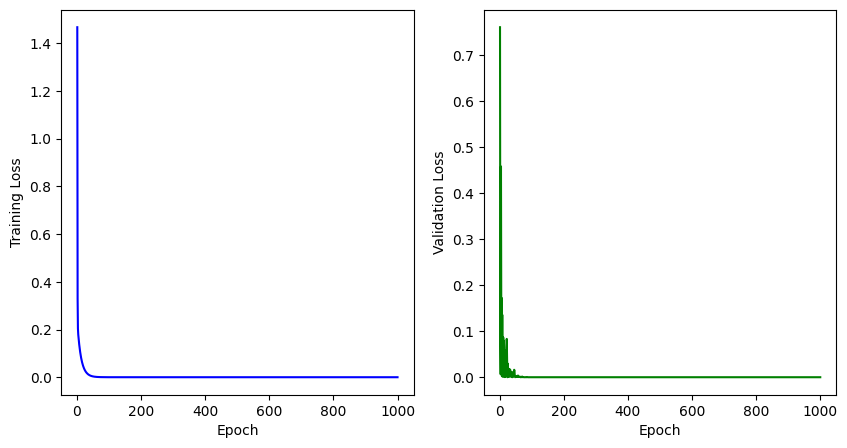


 Mean Square Error is: 3.9936083326813725e-32
 


In [268]:
a = Dense(5, activation_function="reLu")

b = NetModel(input_shape=(2, ), usage="LinearRegression")
#b.add_layer(a)
#b.add_layer(Dense(2, activation_function="reLu"))
b.compile()

X = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y = 2*X[:, 0] + 3*X[:, 1] + 1

b.train(X, y,"l2", nepochs= 1000, learning_rate=0.01)
b.display_losses()

X_p = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y_p = 2*X_p[:, 0] + 3*X_p[:, 1] + 1
h=b.predict_sample(X_p, y_p, "MSE")


Epoch 0:  Loss is 0.21392626627292477 
Epoch 1:  Loss is 0.20292640048741312 
Epoch 2:  Loss is 0.18417520904348927 
Epoch 3:  Loss is 0.15836604730366968 
Epoch 4:  Loss is 0.13703204199753802 
Epoch 5:  Loss is 0.1273219612097422 
Epoch 6:  Loss is 0.12414841027630899 
Epoch 7:  Loss is 0.12300731690889602 
Epoch 8:  Loss is 0.12261801689255222 
Epoch 9:  Loss is 0.12232072283295176 
Epoch 10:  Loss is 0.12202338023068017 
Epoch 11:  Loss is 0.1217189746235488 
Epoch 12:  Loss is 0.12140464855220158 
Epoch 13:  Loss is 0.1210618891888755 
Epoch 14:  Loss is 0.12074106104709702 
Epoch 15:  Loss is 0.12039247462271567 
Epoch 16:  Loss is 0.1200013532386242 
Epoch 17:  Loss is 0.11964750875274427 
Epoch 18:  Loss is 0.11925464889152153 
Epoch 19:  Loss is 0.11884346611856483 
Epoch 20:  Loss is 0.11838549209136635 
Epoch 21:  Loss is 0.11796436616103152 
Epoch 22:  Loss is 0.1175021778811825 
Epoch 23:  Loss is 0.11701832601543993 
Epoch 24:  Loss is 0.11647757483553865 
Epoch 25:  Loss

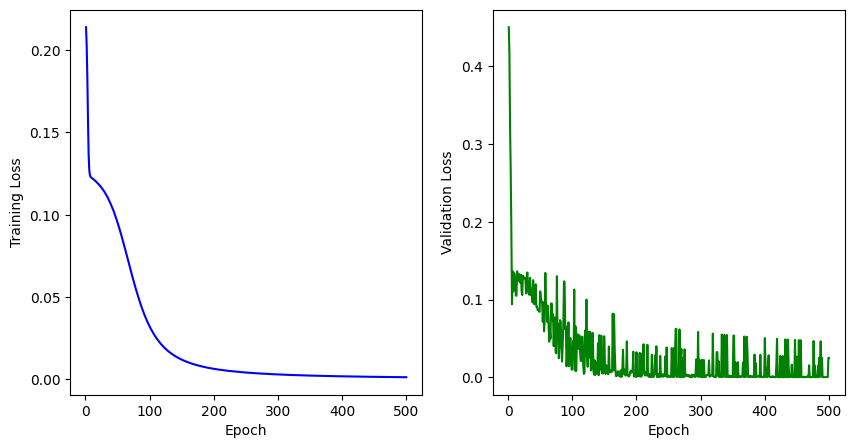


 f1 score: 0.9795918367346937 
 


In [269]:
a = Dense(2, activation_function="reLu", categories=[-1, 1])

b = NetModel(input_shape=(2, ), usage="LogisticRegression")
b.add_layer(a)
b.compile()

X = train_set
Y = np.where(train_y==-1,"Fleur ibis", "Fleur magnenta")
b.train(X, Y,"l2", nepochs= 500, learning_rate=0.01)
b.display_losses()
x = test_set
y = np.where(test_y==-1,"Fleur ibis", "Fleur magnenta")
z=b.predict_sample(x, y, metric="f1")


Epoch 0:  Loss is 1.9861947265350832 
Epoch 1:  Loss is 1.9416101230680916 
Epoch 2:  Loss is 1.9282250095623883 
Epoch 3:  Loss is 1.923905829847673 
Epoch 4:  Loss is 1.9224193776582095 
Epoch 5:  Loss is 1.9218689727109879 
Epoch 6:  Loss is 1.9216422390525352 
Epoch 7:  Loss is 1.9215323015214503 
Epoch 8:  Loss is 1.9214663723576808 
Epoch 9:  Loss is 1.9214176908399163 
Epoch 10:  Loss is 1.9213758844941755 
Epoch 11:  Loss is 1.9213366640870764 
Epoch 12:  Loss is 1.9212981130829105 
Epoch 13:  Loss is 1.9212592937900614 
Epoch 14:  Loss is 1.9212196957900187 
Epoch 15:  Loss is 1.9211790039884638 
Epoch 16:  Loss is 1.9211369944701597 
Epoch 17:  Loss is 1.921093484568836 
Epoch 18:  Loss is 1.921048307341092 
Epoch 19:  Loss is 1.92100129760033 
Epoch 20:  Loss is 1.9209522836156163 
Epoch 21:  Loss is 1.9209010816030485 
Epoch 22:  Loss is 1.9208474915304667 
Epoch 23:  Loss is 1.9207912934295648 
Epoch 24:  Loss is 1.9207322437439607 
Epoch 25:  Loss is 1.9206700714074063 
E

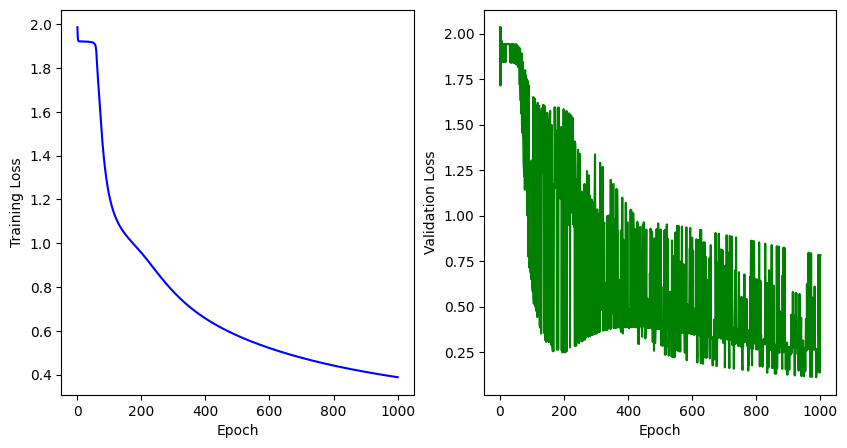

 
Your model accuracy is  93.33333333333333% on this dataset 
 


In [270]:
real_set = np.array(pd.read_csv("C:/Users/Junior/Documents/3A/AI/TDs/iris.data.csv"))
np.random.shuffle(real_set)

size = len(real_set)
X_set = real_set[:,:-1]
Y_set = real_set[:,-1]
X_set = np.hstack((X_set, np.ones(len(Y_set)).reshape((-1, 1))))

_train_set = X_set[:size//2, :]
_train_y = Y_set[:size//2]

_test_set = X_set[size//2: , :]
_test_y = Y_set[size//2:]


b = NetModel(input_shape=(4, ), usage="MultiClassification")
b.add_layer(Dense(3, activation_function="sigmoid"))

b.compile(3, categories=['Iris-setosa','Iris-versicolor', 'Iris-virginica'])

b.train(_train_set, _train_y,"cross_entropy", nepochs= 1000, learning_rate=0.01)
b.display_losses()
z = b.predict_sample(_test_set,_test_y )


In [271]:
b.save("bim_iris")
def load(model_name):
    with open(f"{model_name}.ssj","rb") as save_file:
        load = pickle.load(save_file)
        return load

copy = load("bim_iris")

In [272]:
b.describe()
print("\n\n")
b.summarize()

Layer 0
   label  inputs  outputs
id                       
0              0        3
1              0        3
2              0        3
3              0        3
4              0        3
Layer 1
   label  inputs  outputs
id                       
5              5        3
6              5        3
7              5        3
8              0        3
Layer 2
              label  inputs  outputs
id                                  
9       Iris-setosa       4        0
10  Iris-versicolor       4        0
11   Iris-virginica       4        0



Input shape: (4,)
 Weights: [{'w05': 0.7778687690156744} {'w06': -1.3930168107911909}
 {'w07': 0.751667141468821} {'w15': 0.3816879200200772}
 {'w16': -1.1930667353353173} {'w17': 0.9497118677205526}
 {'w25': 1.088466986005943} {'w26': 1.6496260112787395}
 {'w27': 0.7192533715461399} {'w35': 0.6049946669354351}
 {'w36': 2.716773732012573} {'w37': 0.3892848865647245}
 {'w45': 0.36021392426658755} {'w46': 0.7243587230689281}
 {'w47': 0.341575953613

In [273]:
#copy.describe()